In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv')

In [0]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [0]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [0]:
X = df.loc[:, df.columns != 'Class']

In [0]:
y = df['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [0]:
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
print("Acurracy:", metrics.accuracy_score(y_test,y_pred))

Acurracy: 0.9411764705882353


In [0]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [0]:
pip install graphviz

In [0]:
pip install pydotplus

In [0]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(tree_clf,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )

In [0]:
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

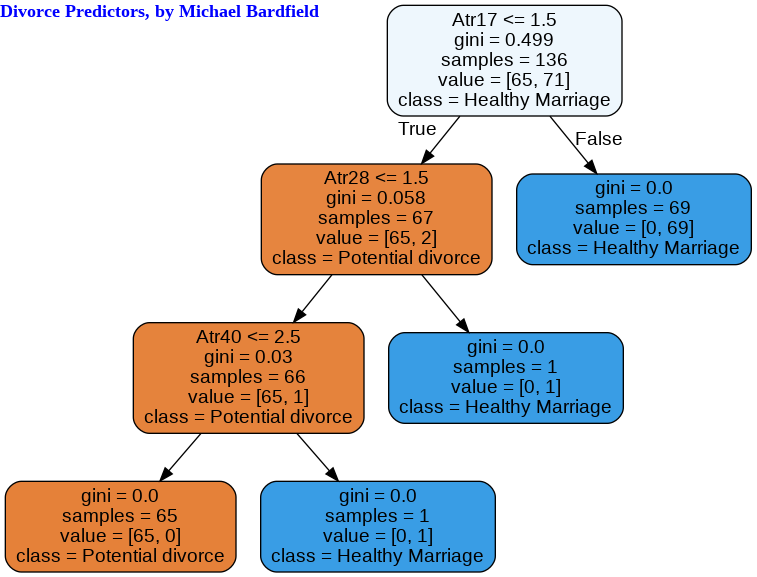

In [0]:
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 18)
draw.text((0, 0), # Drawing offset (position)
          'Divorce Predictors, by Michael Bardfield', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")